In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [360]:
df=pd.read_csv('Books.csv',error_bad_lines=False,encoding='latin-1',sep=';')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/home/s0umyajit/anaconda3/lib/python3.7/site-packages/IPython/core/interac

In [361]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [362]:
df.shape

(271360, 8)

In [363]:
rating=pd.read_csv('Book-Ratings.csv',error_bad_lines=False,encoding='latin-1',sep=';')

In [364]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## For accuracy removing the user who have given less than 200 rating

In [365]:
rating.shape

(1149780, 3)

In [366]:
user_rate=rating.groupby('User-ID')['Book-Rating'].count()
user_rate

User-ID
2          1
7          1
8         18
9          3
10         2
          ..
278846     2
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 105283, dtype: int64

In [367]:
user_rate[user_rate>100]

User-ID
183        136
254        314
507        131
882        126
1424       137
          ... 
277478     214
277639     270
278137     133
278188     197
278418    4533
Name: Book-Rating, Length: 1825, dtype: int64

In [368]:
rating=rating[rating['User-ID'].isin(user_rate[user_rate>200].index)]

In [369]:
rating.shape

(526356, 3)

## For accuracy removing the books which has less than 100 rating

In [370]:
book_rate=rating.groupby('ISBN')['Book-Rating'].count()
book_count

0971880107    615
0316666343    430
0385504209    324
0060928336    305
044021145X    276
             ... 
0876053835      1
0701112344      1
2800100133      1
0205274919      1
0552150649      1
Name: ISBN, Length: 239924, dtype: int64

In [371]:
rating=rating[rating['ISBN'].isin(book_rate[book_rate>100].index)]

In [372]:
rating.head()

,User-ID,ISBN,Book-Rating
1469,277427,0060930535,0
1471,277427,0060934417,0
1474,277427,0061009059,9
1495,277427,0142001740,0
1513,277427,0312966091,0


In [373]:
rating.shape

(13471, 3)

In [374]:
users=pd.read_csv('Users.csv',error_bad_lines=False,encoding='latin-1',sep=';')

In [375]:
users.dropna(inplace=True)

In [376]:
users.head()

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0


In [377]:
users.shape

(168096, 3)

## Merging Data Frames

In [378]:
df=pd.merge(df,rating,on='ISBN')

In [379]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,277478,0
1,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,2977,0
2,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,3363,0
3,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,7346,9
4,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,9856,0


In [380]:
df.shape

(13292, 10)

## Droping Columns 

In [381]:
df.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [382]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0440234743,The Testament,John Grisham,1999,Dell,277478,0
1,0440234743,The Testament,John Grisham,1999,Dell,2977,0
2,0440234743,The Testament,John Grisham,1999,Dell,3363,0
3,0440234743,The Testament,John Grisham,1999,Dell,7346,9
4,0440234743,The Testament,John Grisham,1999,Dell,9856,0


## Feature Engineering and EDA

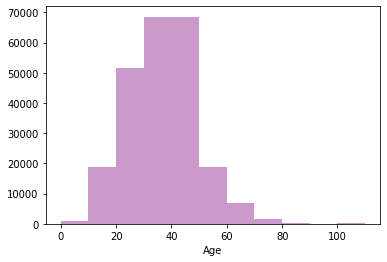

In [383]:
sns.distplot(users['Age'],bins=[0,10,20,30,50,60,70,80,90,100,110],kde=False,color='purple')

# Recommendation Based on Polularity i.e other user ratings

In [384]:
book_mat=pd.pivot_table(data=df,columns='Book-Title',values='Book-Rating',index='User-ID')

In [385]:
book_mat.head()

Book-Title,1st to Die: A Novel,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,A Time to Kill,A Walk to Remember,All I Really Need to Know,Along Came a Spider (Alex Cross Novels),Angels &amp; Demons,...,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Two for the Dough,Vinegar Hill (Oprah's Book Club (Paperback)),We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2766,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,6.0
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,0.0,0.0,0.0


In [386]:
corr=book_mat.corr()

In [387]:
x=corr['The Testament']
x.sort_values(ascending=False).head(6)

Book-Title
The Testament        1.000000
Disclosure           0.710675
The Runaway Jury     0.643302
Kiss the Girls       0.641375
The Street Lawyer    0.581846
Rising Sun           0.576400
Name: The Testament, dtype: float64

In [388]:
def predict(a):
    x=corr[a]
    print(x.sort_values(ascending=False).head(6))
    

In [390]:
predict('A Prayer for Owen Meany')

Book-Title
A Prayer for Owen Meany                               1.000000
Me Talk Pretty One Day                                0.670478
Balzac and the Little Chinese Seamstress : A Novel    0.650686
The Thorn Birds                                       0.582610
Disclosure                                            0.523698
The Runaway Jury                                      0.520401
Name: A Prayer for Owen Meany, dtype: float64


# Prediction Based on colabrorative filtering

In [391]:
user_mat=pd.pivot_table(data=df,values='Book-Rating',columns='User-ID',index='Book-Title').fillna(0.0)

In [392]:
user_mat.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Map of the World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Painted House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Prayer for Owen Meany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [393]:
df2=user_mat.reset_index()
df2.head()

User-ID,Book-Title,254,2276,2766,2977,3363,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
0,1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A Is for Alibi (Kinsey Millhone Mysteries (Pap...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A Map of the World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Painted House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A Prayer for Owen Meany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [394]:
from scipy.sparse import csr_matrix

In [395]:
user_matrix=csr_matrix(user_mat.values)

In [396]:
from sklearn.neighbors import NearestNeighbors

In [397]:
knn=NearestNeighbors(metric='cosine',algorithm='brute')

In [398]:
knn.fit(user_mat)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [399]:
df2[df2['Book-Title']=='The Testament']

User-ID,Book-Title,254,2276,2766,2977,3363,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
81,The Testament,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [401]:
x=user_mat.iloc[81,:].values.reshape(1,-1)
x

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0., 10.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [402]:
distances, indices = knn.kneighbors(x,n_neighbors = 6)

In [403]:
for i in range(len(distances.flatten())):
    x=indices.flatten()[i]
    y=distances.flatten()[i]
    print(df2['Book-Title'][x],'\t',y)
    

The Testament 	 0.0
The Street Lawyer 	 0.6665829463841084
The Brethren 	 0.7188605304193078
The Summons 	 0.7425586519036658
The Runaway Jury 	 0.7525770327564452
Kiss the Girls 	 0.7946238489678142
